## Author - Zashank Khare

### The Spark Foundtion
#### Domain : Data Science & Business Analytics Tasks
#### Task2 : Prediction using Unsupervised ML

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

### Loading Datasets

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
printmd("**Displaying first five records of df**")
df.head()

**Displaying first five records of df**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
printmd("**Displaying last five records of df**")
df.tail()

**Displaying last five records of df**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
printmd("**Shape of df:**")
df.shape

**Shape of df:**

(150, 6)

In [6]:
printmd("**Descriptive Statistics:**")
df.describe()

**Descriptive Statistics:**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
printmd("**Checking for null values:**")
df.isnull().sum() 

**Checking for null values:**

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As can be seen there are no null values present in the data

In [8]:
printmd("**Checking for duplicate values:**")
df.duplicated().sum()     

**Checking for duplicate values:**

0

There are no duplicates records present in the data

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
X = df.loc[:,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Model and Fit

#### For finding optimal number of clusters we are using the elbow method  

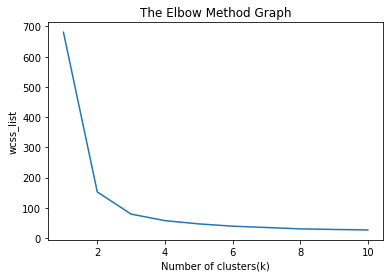

In [12]:
wcss = []  

for i in range(1, 11):  
    model = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    model.fit(X)  
    wcss.append(model.inertia_)  
plt.plot(range(1, 11), wcss)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

From the above plot, we can see the elbow point is at 3. So the number of clusters here will be **3**.

In [13]:
printmd('Displaying the sum of squared distance between each point and the centroid in a cluster:')
wcss

Displaying the sum of squared distance between each point and the centroid in a cluster:

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.535582051282056,
 38.930963049671746,
 34.598978434287126,
 30.085307692307694,
 28.06327473272554,
 26.587316820410813]

#### Applying kmeans to the dataset and creating the kmeans classifier

In [14]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(X)

In [15]:
printmd('Displaying the cluster centres points')
print(model.cluster_centers_)

Displaying the cluster centres points

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [16]:
printmd('Displaying model labels')
print(model.labels_)

Displaying model labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [17]:
printmd('Displaying model inertia')
print(model.inertia_)

Displaying model inertia

78.94084142614602


#### Plotting a scatter plot for rough analysis of clusters

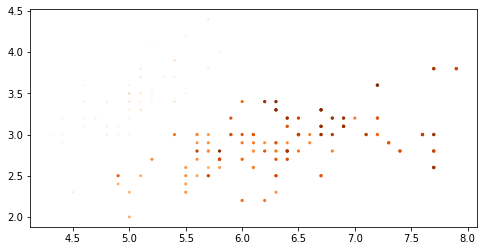

In [18]:
plt.figure(figsize = (8,4))
plt.scatter(X[:,0], X[:,1],X[:,2],X[:,3], cmap = 'Oranges',alpha=1)
plt.show();

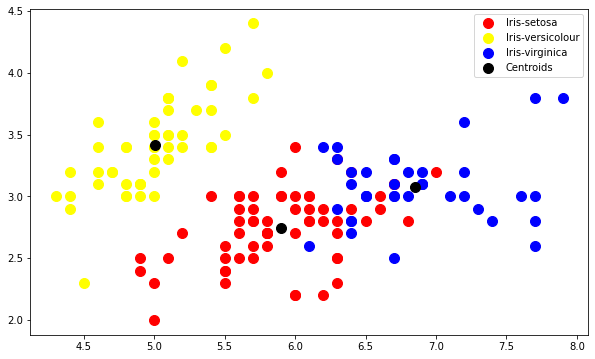

In [19]:
plt.figure(figsize = (10,6))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

### Thanks & Happy Learning